Descargamos 

In [ ]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Descargamos las imágenes de train 
download = drive.CreateFile({'id': '1cWLGs6DeKLSZtXcfhCFIZF5HwJtaUU9S'})
download.GetContentFile('train_jpg.zip')

In [ ]:
# Descargamos las imágenes de test
download = drive.CreateFile({'id': '1-2lOQ9TXhFeLqWWQ-mtXyJ88xT8Ok-H2'})
download.GetContentFile('test_jpg.zip')

In [ ]:
# Descargamos train.csv
download = drive.CreateFile({'id': '1Z1GunyEZgV37--xOpjRAs813K4voXEdJ'})
download.GetContentFile('train.csv')

In [ ]:
# Descargamos sample_submission.csv
download = drive.CreateFile({'id': '17M5HM0_SNxtB82TBl1VWAeRnvU5N9hzh'})
download.GetContentFile('sample_submission.csv')

In [ ]:
!unzip train_jpg.zip

Archive:  train_jpg.zip
   creating: content/train_jpg/
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.37666181488793022858518882494618633979.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.24377362062409477070465522674137587026.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.44735997048413703295756484532477940689.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.10873140185372483384104313397133134339.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.65508049594021597581136525739723111726.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.11955524769280763472642014279467394399.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.67688242634068470294792004242095756627.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.21653274804312754324862594687925832678.jpg  
  inflating: content/train_jpg/1.2.826.0.1.3680043.8.498.10072001800484199846734151421006166369.jpg  
  inflating: content/train

In [ ]:
!unzip test_jpg.zip

Archive:  test_jpg.zip
   creating: content/test_jpg/
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.89464178623477682032826898567676520965.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.88805143461424536216618620186118636709.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.98728424991502738683495611458161933905.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.76482195481290376937939274201235029927.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.83870739165993064101979563581809238327.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.80533585890806318160595000524214742843.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.85768051534448835576877567773398478895.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.90240400296093633201761059427668477066.jpg  
  inflating: content/test_jpg/1.2.826.0.1.3680043.8.498.76683112957077203895039340899872574910.jpg  
  inflating: content/test_jpg/1.2.826

**Borramos los zips**

In [ ]:
!rm -rf train_jpg.zip

In [ ]:
!rm -rf test_jpg.zip

# **Clasificador**

In [ ]:
#Cargamos el csv en un dataframe

import pandas as pd
train_csv = pd.read_csv('/content/train.csv')

In [ ]:
# Creamos una carpeta para cada categoría

import os
for folder in list(train_csv.Target.unique()):
  os.mkdir(f'/content/content/train_jpg/{folder}')

In [ ]:
# Trasladamos las imágenes a su carpeta correspondiente

import glob
import shutil
for file in glob.glob("/content/content/train_jpg/*.jpg"):
  folder = train_csv.loc[train_csv.SOPInstanceUID == file[27:-4]].Target.values[0]
  print(folder)

  path_dest = f'/content/content/train_jpg/{folder}/' + file[27:]
  shutil.move(file, path_dest)

3
14
17
10
3
3
12
3
3
2
2
14
6
3
3
11
3
3
3
3
0
13
16
3
14
3
3
1
3
15
3
10
14
15
3
3
3
14
3
6
2
6
6
0
3
21
3
0
3
3
1
3
7
14
3
6
3
2
5
3
3
6
3
6
9
4
6
3
2
3
0
14
3
3
3
6
3
3
11
12
3
0
3
3
3
15
21
3
13
3
3
21
3
21
1
3
15
2
3
12
14
14
14
6
13
11
3
12
3
3
16
3
3
11
17
11
3
3
6
14
3
21
2
11
13
3
14
2
18
13
3
3
3
2
0
3
3
5
15
0
3
11
0
16
6
3
3
3
3
16
1
14
3
11
3
3
3
6
3
3
14
3
3
3
3
6
11
6
11
0
12
3
12
15
15
17
3
2
21
3
3
3
21
14
3
12
3
3
15
14
0
0
13
0
9
6
2
3
2
3
3
3
21
3
6
15
9
3
11
11
3
1
3
3
0
3
5
11
3
14
3
9
3
3
21
3
17
0
3
0
3
18
3
5
9
3
2
3
10
15
6
13
21
1
3
3
11
5
10
3
3
14
3
3
6
3
3
8
3
3
14
11
3
8
13
3
2
3
15
3
14
6
2
3
21
21
1
17
3
3
3
3
3
0
3
3
3
6
11
0
0
3
16
21
1
3
3
9
3
1
11
11
0
11
0
15
6
15
17
14
14
2
5
3
21
6
20
6
11
3
21
3
3
3
0
3
16
6
3
3
17
3
3
14
14
1
9
3
11
6
3
3
0
9
2
8
16
3
0
3
3
15
3
11
21
3
3
3
3
3
3
3
3
3
21
1
3
2
5
3
3
3
3
14
0
13
3
8
4
3
3
3
17
2
3
15
6
3
15
6
10
3
3
3
4
11
0
3
3
15
3
0
13
1
9
10
0
3
0
16
1
14
0
14
3
17
3
3
4
3
3
3
14
3
0
11
1
3
3
21
3
3
7
3
3


In [ ]:
# Comprobamos las fotos que hay en el directorio de cada categoría

N = 0
for folder in glob.glob("/content/content/train_jpg/*/"):
  for dirpath, dirnames, filenames in os.walk(folder):
      N_c = len(filenames)
      N += N_c
      print("Fotos en ", dirpath, N_c)

print("Total Fotos ",N)

Fotos en  /content/content/train_jpg/3/ 579
Fotos en  /content/content/train_jpg/17/ 18
Fotos en  /content/content/train_jpg/1/ 32
Fotos en  /content/content/train_jpg/15/ 53
Fotos en  /content/content/train_jpg/21/ 50
Fotos en  /content/content/train_jpg/18/ 8
Fotos en  /content/content/train_jpg/2/ 61
Fotos en  /content/content/train_jpg/5/ 18
Fotos en  /content/content/train_jpg/12/ 15
Fotos en  /content/content/train_jpg/8/ 9
Fotos en  /content/content/train_jpg/4/ 7
Fotos en  /content/content/train_jpg/10/ 15
Fotos en  /content/content/train_jpg/20/ 12
Fotos en  /content/content/train_jpg/13/ 31
Fotos en  /content/content/train_jpg/9/ 24
Fotos en  /content/content/train_jpg/11/ 81
Fotos en  /content/content/train_jpg/16/ 32
Fotos en  /content/content/train_jpg/7/ 12
Fotos en  /content/content/train_jpg/14/ 96
Fotos en  /content/content/train_jpg/0/ 64
Fotos en  /content/content/train_jpg/6/ 56
Fotos en  /content/content/train_jpg/19/ 5
Total Fotos  1278


#Model test:

# Download data

In [ ]:
# Import fastai
from fastai.vision import *

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download dataset
path = '/content/content/train_jpg/'

In [ ]:
path

'/content/content/train_jpg/'

In [ ]:
# Open image with fastai helper function
img = open_image('/content/content/train_jpg/0/1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258.jpg')

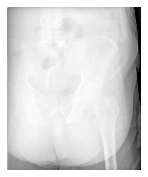

In [ ]:
img.show()

In [ ]:
img.shape

torch.Size([3, 4240, 3480])

# 1. Load and explore data

In [ ]:
# Load data
batch_size = 32
size = 255
data = ImageDataBunch.from_folder(path= path, train="/content/content/train_jpg", test="/content/content/test_jpg", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

You can check this [link](https://docs.fast.ai/vision.data.html) to learn many more options to load data

In [ ]:
# Show classes
data.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [ ]:
print(len(data.classes))

22


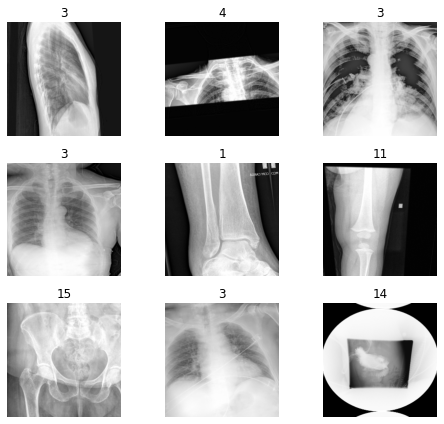

In [ ]:
# Show samples of data
data.show_batch(rows=3, figsize=(7,6))

# 2.   Train the model

In [ ]:
# Initialize learner
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

You can check this [link](https://fastai1.fast.ai/vision.models.html) to learn the different state of the art models implemented in fastai

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


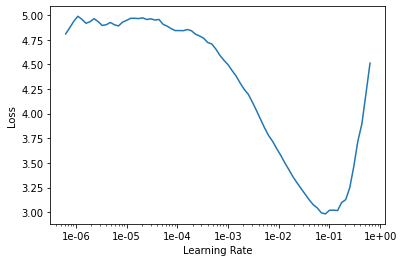

In [ ]:
# Find optimum learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 1e-3

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(5, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,3.696576,1.766382,0.545098,11:23
1,2.176133,0.688142,0.827451,11:15
2,1.489551,0.555908,0.882353,11:20
3,1.072284,0.535404,0.894118,11:22
4,0.863587,0.529998,0.890196,11:12


In [ ]:
# Save model
learn.save("score-8901")

In [ ]:
# Unfreeze conv layers
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


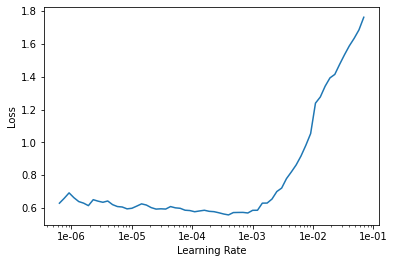

In [ ]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [ ]:
# Set learning rate
lr = 1e-3

In [ ]:
# Train 5 epochs
learn.fit_one_cycle(5, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.571790,0.463638,0.905882,14:43
1,0.508100,0.425873,0.901961,14:37
2,0.417324,0.357218,0.905882,14:40
3,0.332228,0.332914,0.921569,14:34
4,0.244803,0.336323,0.921569,14:31


In [ ]:
# Save model
learn.save("score-9215")

In [ ]:
import numpy as np

Test = '/content/content/test_jpg'

In [ ]:
from fastai.basic_data import DatasetType
preds_test, target_test = learn.get_preds(DatasetType.Test)
y = torch.argmax(preds_test, dim=1)
y.numpy().shape

(328,)

In [ ]:
preds_test.shape

torch.Size([328, 22])

In [ ]:
target_test

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
preds_test

tensor([[1.3567e-04, 1.7893e-03, 3.0869e-05,  ..., 7.5172e-04, 1.7813e-01,
         2.3207e-04],
        [1.4421e-08, 1.4336e-07, 3.8888e-09,  ..., 3.4780e-08, 7.0431e-08,
         9.9315e-09],
        [9.9689e-01, 1.4924e-06, 5.4789e-06,  ..., 6.6838e-07, 1.0583e-07,
         2.0814e-06],
        ...,
        [2.3323e-06, 1.0549e-07, 6.8050e-08,  ..., 7.3781e-07, 4.5449e-07,
         7.2680e-07],
        [7.5828e-07, 4.2453e-06, 1.5836e-06,  ..., 2.8460e-07, 1.2226e-06,
         3.1906e-07],
        [2.0973e-02, 3.6598e-03, 1.2139e-03,  ..., 1.7585e-04, 1.0684e-03,
         1.4128e-03]])

In [ ]:
pred_classes = []
for index in y: 
  pred_classes.append(int(data.classes[index]))

len(pred_classes)

328

In [ ]:
num = len(learn.data.test_ds)
filenames = []
for i in range(num):
  filenames.append(str(learn.data.test_ds.items[i]).split('/')[4])

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')
print(submission.shape)
submission['Target'] = pred_classes
submission['SOPInstanceUID'] = filenames
submission

(328, 2)


,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.77779200805708720169...,12
1,1.2.826.0.1.3680043.8.498.99621470338178711699...,3
2,1.2.826.0.1.3680043.8.498.90681656747331345812...,0
3,1.2.826.0.1.3680043.8.498.79153174343097750220...,3
4,1.2.826.0.1.3680043.8.498.81111929474360579039...,2
...,...,...
323,1.2.826.0.1.3680043.8.498.81606711267481959554...,3
324,1.2.826.0.1.3680043.8.498.98990247462816558521...,15
325,1.2.826.0.1.3680043.8.498.83870739165993064101...,3
326,1.2.826.0.1.3680043.8.498.98728424991502738683...,3


In [ ]:
submission.to_csv('submission.csv',index=False)

In [ ]:
text=open('submission.csv','r')
text = ''.join([i for i in text]).replace('.jpg','')
x= open('final_submission.csv','w')
x.writelines(text)
x.close()

In [ ]:
final_csv = pd.read_csv("/content/final_submission.csv")
final_csv

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.77779200805708720169...,12
1,1.2.826.0.1.3680043.8.498.99621470338178711699...,3
2,1.2.826.0.1.3680043.8.498.90681656747331345812...,0
3,1.2.826.0.1.3680043.8.498.79153174343097750220...,3
4,1.2.826.0.1.3680043.8.498.81111929474360579039...,2
...,...,...
323,1.2.826.0.1.3680043.8.498.81606711267481959554...,3
324,1.2.826.0.1.3680043.8.498.98990247462816558521...,15
325,1.2.826.0.1.3680043.8.498.83870739165993064101...,3
326,1.2.826.0.1.3680043.8.498.98728424991502738683...,3
